# Analysis of Elevation Profiles of Hiking Trails

## Introduction 
This project focuses on the analysis of elevation profiles of hiking trails. The data sources used are hiking trails from [OpenStreetMap (OSM)](https://www.openstreetmap.org) and elevation data from the [DMR 5G](https://ags.cuzk.cz/arcgis/rest/services/3D/dmr5g/ImageServer) obtained from the [Czech Office for Surveying, Mapping and Cadastre (ČÚZK)](https://cuzk.cz). The project primarily focuses on hiking trails marked by the [Czech Tourist Club (KČT)](https://www.kct.cz).


## Import of libraries

#### Import standard libraries
[os](https://docs.python.org/3/library/os.html)  
[warnings](https://docs.python.org/3/library/warnings.html)  
[numpy](https://numpy.org/doc/stable/)  

#### Import libraries for data and geospatial data processing
[requests](https://docs.python-requests.org/en/latest/)  
[geopandas](https://geopandas.org/)  
[rasterio](https://rasterio.readthedocs.io/en/latest/)  
[shapely](https://shapely.readthedocs.io/en/stable/)  

#### Import libraries for visualization
[matplotlib](https://matplotlib.org/)  
[folium](https://python-visualization.github.io/folium/)  

#### Import libraries for working with OSM data
[osmapi](https://osmapi.tilmannr.de/)

newer library to work with OSM

[osmnx](https://osmnx.readthedocs.io/en/stable/)  


In [1]:
# Import Standard Libraries
import numpy as np

# Import Libraries for Data and Geospatial Processing
import requests
import geopandas as gpd
import rasterio
from rasterio.plot import show
from shapely.geometry import Point, LineString, MultiLineString, Polygon


# Import Libraries for Visualization
import matplotlib.pyplot as plt
import folium

# Import Libraries for Working with OSM Data
import osmapi
import overpy

In [2]:
# Initialize Overpass API
api = overpy.Overpass()

In [3]:
# Function to get the area ID by place name
def get_area_id(area_name):
    # Query to get the area ID for the given place name
    area_query = f"""
    [out:json];
    area["name"="{area_name}"]["boundary"="administrative"];
    out body;
    """
    area_result = api.query(area_query)
    if len(area_result.areas) == 0:
        #print(f"No area found for {area_name}")
        return None
    return area_result.areas[0].id

In [4]:
# Function to fetch hiking routes by KČT for the specified area
def fetch_hiking_routes(area_id):
    # Query to get the IDs of hiking routes by KČT for the specified area
    relation_query = f"""
    [out:json];
    area({area_id});
    relation(area)["route"="hiking"]["operator"="cz:KČT"];
    out ids;
    """
    result = api.query(relation_query)
    return result

In [5]:
# Function to download a relation by its ID
def download_relation(relation_id):
    try:
        with osmapi.OsmApi() as osm_api:
            return osm_api.RelationGet(relation_id)
    except osmapi.errors.ElementDeletedApiError:
        print(f"Relation with ID {relation_id} not found.")
        return None

In [6]:
def download_hiking_routes():
    
    area_name = input("Enter the name of the area: ")
    area_id = get_area_id(area_name)
    
    if area_id is None:
        print(f"{area_name} not found")
        return None
    
    result = fetch_hiking_routes(area_id)
    print(result)
    
    relations = []
    for relation in result.relations:
        rel = download_relation(relation.id)
        if rel:
            relations.append(rel)
    
    if relations:
        print(f"{len(relations)} hiking routes for {area_name}.")
        return relations
    else:
        print(f"No hiking routes were found in {area_name}.")
        return None

In [7]:
if __name__ == "__main__": relations = download_hiking_routes()

# print(relations)

Enter the name of the area:  Plzeň


4 hiking routes for Plzeň.


In [8]:
relation = relations[1]
print(relation)

{'id': 132429, 'visible': True, 'version': 129, 'changeset': 154743187, 'timestamp': datetime.datetime(2024, 8, 2, 16, 4, 15), 'user': 'VLD171', 'uid': 11452275, 'tag': {'complete': 'yes', 'destinations': 'Plzeň;Úterý;Toužim', 'kct_green': 'major', 'network': 'rwn', 'operator': 'cz:KČT', 'osmc:symbol': 'green:white:green_bar', 'ref': '3601', 'route': 'hiking', 'type': 'route'}, 'member': [{'type': 'node', 'ref': 5369697091, 'role': 'guidepost'}, {'type': 'node', 'ref': 5270103895, 'role': 'guidepost'}, {'type': 'node', 'ref': 5267830163, 'role': 'guidepost'}, {'type': 'node', 'ref': 5267792101, 'role': 'guidepost'}, {'type': 'node', 'ref': 4336684698, 'role': 'guidepost'}, {'type': 'node', 'ref': 4334055671, 'role': 'guidepost'}, {'type': 'node', 'ref': 4334055670, 'role': 'guidepost'}, {'type': 'node', 'ref': 4334022945, 'role': 'guidepost'}, {'type': 'node', 'ref': 4333998066, 'role': 'guidepost'}, {'type': 'node', 'ref': 4333998067, 'role': 'guidepost'}, {'type': 'node', 'ref': 1360

The hiking trail relation is downloaded using [OsmApi](https://osmapi.tilmannr.de/). A complete overview of hiking trail numbers in the Czech Republic is available [here](https://osm.paws.cz/hiking.php).

In [2]:
# Function to download a relation by its ID
def download_relation(relation_id):
    try:
        with osmapi.OsmApi() as api:
            return api.RelationGet(relation_id)
    except osmapi.errors.ElementDeletedApiError:
        print(f"Relation with ID {relation_id} not found.")
        return None

Example Usage

In [3]:
# Example ID
relation_id = 334313
relation = download_relation(relation_id)
print(relation)

{'id': 334313, 'visible': True, 'version': 48, 'changeset': 159671790, 'timestamp': datetime.datetime(2024, 11, 27, 18, 14, 37), 'user': 'sannorra', 'uid': 1424365, 'tag': {'complete': 'yes', 'educational': 'yes', 'kct_yellow': 'major', 'name': 'Sigmondova okružní naučná stezka', 'network': 'lwn', 'note': 'Značena žlutým pásovým značením', 'official_name': 'Sigmondova okružní NS', 'operator': 'cz:KČT', 'osmc:symbol': 'yellow:white:yellow_bar', 'ref': '6711', 'route': 'hiking', 'type': 'route'}, 'member': [{'type': 'node', 'ref': 364493953, 'role': 'guidepost'}, {'type': 'node', 'ref': 676243685, 'role': 'guidepost'}, {'type': 'node', 'ref': 676475796, 'role': 'guidepost'}, {'type': 'node', 'ref': 655359905, 'role': 'guidepost'}, {'type': 'node', 'ref': 806808290, 'role': 'guidepost'}, {'type': 'node', 'ref': 2205940692, 'role': 'board'}, {'type': 'node', 'ref': 2205940676, 'role': 'board'}, {'type': 'node', 'ref': 676243685, 'role': 'guidepost'}, {'type': 'node', 'ref': 7099707271, 'ro

In [9]:
# Function to extract descriptive route information from a relation
def extract_route_info(relation):
    tags = relation.get('tag', {})
    route_info = {
        'id': relation['id'],
        'name': tags.get('name', 'Name not provided'),
        'official_name': tags.get('official_name', 'Official name not provided'),
        'route_type': tags.get('route', 'Unknown route type'),
        'operator': tags.get('operator', 'Operator not provided'),
        'symbol': tags.get('osmc:symbol', 'Symbol not provided'),
        'ref': tags.get('ref', 'Reference not provided'),
        'complete': tags.get('complete', 'Not specified'),
        'educational': tags.get('educational', 'Not specified'),
        'network': tags.get('network', 'Unknown network'),
        'kct_yellow': tags.get('kct_yellow', 'Not specified'),
        'note': tags.get('note', 'No note provided'),
    }
    return route_info

In [10]:
# Extract descriptive path information
route_info = extract_route_info(relation)

# Print descriptive path information
print("Descriptive information about the path:")
for key, value in route_info.items():
    print(f"{key}: {value}")

Descriptive information about the path:
id: 132429
name: Name not provided
official_name: Official name not provided
route_type: hiking
operator: cz:KČT
symbol: green:white:green_bar
ref: 3601
complete: yes
educational: Not specified
network: rwn
kct_yellow: Not specified
note: No note provided


Function to save relation to geodataframe

In [11]:
def relation_to_geodataframe(relation):
    
    members = relation.get('member', [])
    data = []
    
    for member in members:
        member_type = member.get('type')
        ref = member.get('ref')
        role = member.get('role', '')
        
        if member_type == 'way':
            # Fetch geometry for "way" using the API
            with osmapi.OsmApi() as api:
                way = api.WayGet(ref)
                nodes = way['nd']
                coords = [(api.NodeGet(node_id)['lon'], api.NodeGet(node_id)['lat']) for node_id in nodes]
                geometry = LineString(coords)
                data.append({
                    'type': member_type,
                    'ref': ref,
                    'role': role,
                    'geometry': geometry
                })

    # Create GeoDataFrame
    gdf = gpd.GeoDataFrame(data, geometry='geometry')
    return gdf


Example of usage

In [12]:
# Example usage
gdf = relation_to_geodataframe(relation)
display(gdf.head())

,type,ref,role,geometry
0,way,437105531,,"LINESTRING (12.99258 50.05080, 12.99255 50.05091)"
1,way,364615133,,"LINESTRING (12.99654 50.05037, 12.99596 50.050..."
2,way,364615126,,"LINESTRING (13.00940 50.05012, 13.00930 50.050..."
3,way,364615125,,"LINESTRING (13.01505 50.05073, 13.01455 50.050..."
4,way,364615122,,"LINESTRING (13.02277 50.04773, 13.02242 50.048..."


In [13]:
# Function to determine the trail color from the "osmc:symbol" tag
def get_trail_color(symbol):
    # Examples of mapping the symbol to a color (you can add more symbols as needed)
    if 'yellow' in symbol:
        return 'yellow'
    elif 'red' in symbol:
        return 'red'
    elif 'green' in symbol:
        return 'green'
    elif 'blue' in symbol:
        return 'blue'
    else:
        return 'gray'  # Default color if no match


In [14]:
trail_symbol = route_info.get('symbol')

trail_color = get_trail_color(trail_symbol)

route_name = route_info.get('name', 'No name provided')

In [15]:
# Getting the bounds of the GeoDataFrame (bounding box)
bbox = gdf.total_bounds  # Returns [minx, miny, maxx, maxy]

# Calculate width and height from the bounding box
minx, miny, maxx, maxy = bbox

center = [(miny + maxy) / 2, (minx + maxx) / 2]

m = folium.Map(location=center, zoom_start=14)

gdf.explore(m=m, tiles="carto positron", color=trail_color)

display(m)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 106: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 106: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 106: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 106: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 100: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 100: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 100: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 100: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 100: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 100: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 100: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 100: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 101: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 101: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 101: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 101: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 107: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 107: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 107: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 107: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 98: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 98: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 98: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 98: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 99: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 99: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 99: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 99: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 106: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 106: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 106: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 106: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 100: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 100: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 100: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 100: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 100: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 100: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 100: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 100: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 101: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 101: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 101: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 101: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 107: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 107: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 107: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 107: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 98: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 98: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 98: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 98: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 99: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 99: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 99: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 99: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 106: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 106: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 106: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 106: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 100: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 100: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 100: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 100: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 100: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 100: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 100: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 100: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 101: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 101: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 101: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 101: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 107: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 107: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 107: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 107: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 98: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 98: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 98: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 98: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 99: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 99: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 99: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 99: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 106: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 106: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 106: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 106: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 100: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 100: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 100: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 100: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 100: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 100: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 100: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 100: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 101: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 101: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 101: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 101: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 107: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 107: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 107: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 107: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 98: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 98: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 98: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 98: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 99: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 99: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 99: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 99: invalid continuation byte


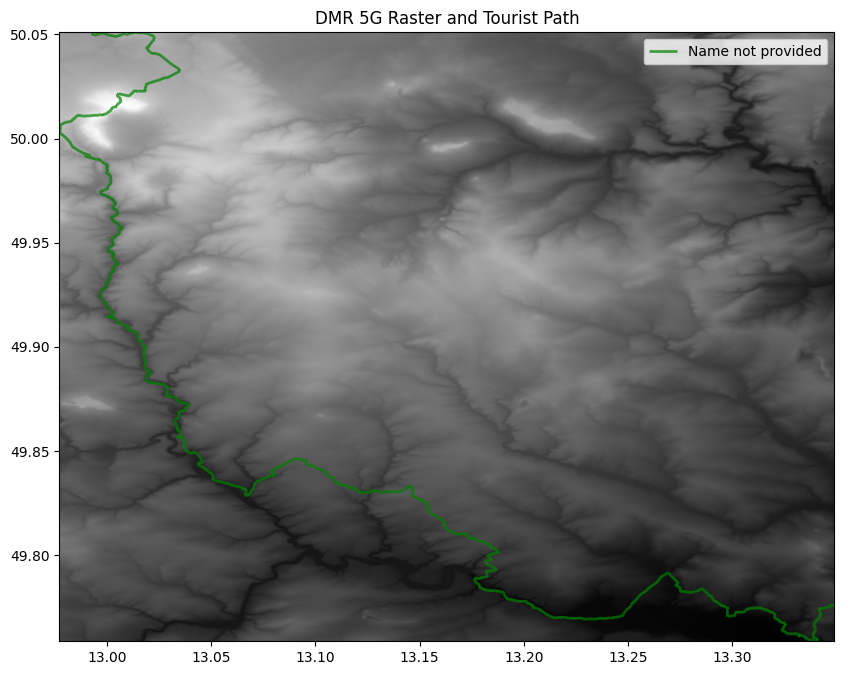

In [16]:
width = maxx - minx
height = maxy - miny

max_size = 1200  # Maximum dimension size (for either width or height)

aspect_ratio = width / height

if width > height:
    image_width = max_size
    image_height = int(image_width / aspect_ratio)
else:
    image_height = max_size
    image_width = int(image_height * aspect_ratio)

url = "https://ags.cuzk.cz/arcgis2/rest/services/dmr5g/ImageServer/exportImage"

params = {
    "bbox": f"{minx},{miny},{maxx},{maxy}",  # Bounding box coordinates (minx, miny, maxx, maxy)
    "bboxSR": 4326,  # Spatial reference for the bounding box (WGS 84)
    "imageSR": 4326,  # Spatial reference for the image (WGS 84)
    "size": f"{image_width},{image_height}",  # Dynamically set image size (in pixels)
    "format": "tiff",  # Output format (TIFF)
    "f": "image"  # Requesting the image (raster data)
}

response = requests.get(url, params=params)

if response.status_code == 200:
    # Save the response content (TIFF file) to a local file
    with open("dmr5g_bounding_box.tif", "wb") as f:
        f.write(response.content)

    #Open the saved TIFF file using rasterio
    with rasterio.open("dmr5g_bounding_box.tif") as src:

        fig, ax = plt.subplots(figsize=(10, 10))
        
        show(src, ax=ax, cmap='gray')
        
        gdf.plot(ax=ax, color=trail_color, alpha=0.7, edgecolor='black', linewidth=2, label=route_name)
        
        # Add a title
        plt.title("DMR 5G Raster and Tourist Path")
        
        # Display the plot
        plt.legend()
        plt.show()

else:
    print(f"Failed to download raster data. Status code: {response.status_code}")

In [17]:
print(gdf.crs)

gdf_length = gdf.set_crs(epsg=4326, allow_override=True)

gdf_length = gdf_length.to_crs(epsg=3395)

gdf_length['length'] = gdf_length.length

gdf_length = gdf_length.set_crs(epsg=4326, allow_override=True)

print(gdf_length.head())

None
  type        ref role                                           geometry  \
0  way  437105531       LINESTRING (1446327.48988 6422301.71663, 14463...   
1  way  364615133       LINESTRING (1446768.38185 6422227.39360, 14467...   
2  way  364615126       LINESTRING (1448200.21767 6422184.19009, 14481...   
3  way  364615125       LINESTRING (1448828.51601 6422290.28892, 14487...   
4  way  364615122       LINESTRING (1449688.67058 6421771.35638, 14496...   

        length  
0    20.344942  
1   564.396719  
2  1582.839840  
3   697.361324  
4  1136.122704  


In [18]:
with rasterio.open("dmr5g_bounding_box.tif") as src:
    elevation_data = []

    for line in gdf.geometry:
        for coord in line.coords:
            lon, lat = coord

            row, col = src.index(lon, lat)

            if 0 <= row < src.height and 0 <= col < src.width:
                elevation = src.read(1)[row, col]
            else:
                elevation = None
            elevation_data.append({'lon': lon, 'lat': lat, 'elevation': elevation})

elevation_gdf = gpd.GeoDataFrame(
    elevation_data, 
    geometry=gpd.points_from_xy([d['lon'] for d in elevation_data], [d['lat'] for d in elevation_data]),
    crs="EPSG:4326"
)

gdf_length = gdf.set_crs(epsg=4326, allow_override=True)
gdf_length = gdf_length.to_crs(epsg=3395)
gdf_length['length'] = gdf_length.length

gdf['elevation'] = None

for idx, line in gdf.iterrows():
    for coord in line['geometry'].coords:
        lon, lat = coord
        elevation = elevation_gdf[(elevation_gdf['lon'] == lon) & (elevation_gdf['lat'] == lat)]['elevation'].values
        if elevation.size > 0:
            gdf.at[idx, 'elevation'] = elevation[0]
gdf['length'] = gdf_length['length']

print(gdf[['geometry', 'elevation', 'length']])

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 106: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 106: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 106: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 106: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 100: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 100: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 100: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 100: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 100: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 100: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 100: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 100: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 101: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 101: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 101: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 101: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 107: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 107: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 107: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 107: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 98: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 98: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 98: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 98: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 99: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 99: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 99: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 99: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 106: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 106: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 106: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 106: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 100: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 100: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 100: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 100: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 100: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 100: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 100: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 100: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 101: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 101: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 101: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 101: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 107: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 107: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 107: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 107: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 98: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 98: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 98: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 98: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 99: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 99: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 99: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 99: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 106: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 106: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 106: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 106: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 100: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 100: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 100: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 100: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 100: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 100: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 100: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 100: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 101: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 101: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 101: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 101: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 107: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 107: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 107: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 107: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 98: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 98: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 98: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 98: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 99: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 99: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 99: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 99: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 106: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 106: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 106: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 106: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 100: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 100: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 100: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 100: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 100: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 100: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 100: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 100: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 101: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 101: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 101: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 101: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 107: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 107: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 107: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 107: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 98: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 98: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 98: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 98: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 99: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 99: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 99: invalid continuation byte

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "C:\Users\kovar\AppData\Roaming\Python\Python39\site-packages\rasterio\env.py", line 338, in defenv
    local._env.start()
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 99: invalid continuation byte


                                              geometry   elevation  \
0    LINESTRING (12.99258 50.05080, 12.99255 50.05091)  611.966187   
1    LINESTRING (12.99654 50.05037, 12.99596 50.050...  611.103943   
2    LINESTRING (13.00940 50.05012, 13.00930 50.050...  603.303162   
3    LINESTRING (13.01505 50.05073, 13.01455 50.050...  658.819641   
4    LINESTRING (13.02277 50.04773, 13.02242 50.048...  669.511292   
..                                                 ...         ...   
233  LINESTRING (13.34210 49.77080, 13.34207 49.770...  393.397675   
234  LINESTRING (13.34277 49.77147, 13.34274 49.771...  404.579712   
235  LINESTRING (13.34731 49.77554, 13.34737 49.77558)  404.579712   
236  LINESTRING (13.34819 49.77592, 13.34820 49.775...  404.579712   
237  LINESTRING (13.34909 49.77641, 13.34902 49.776...  404.840637   

          length  
0      20.344942  
1     564.396719  
2    1582.839840  
3     697.361324  
4    1136.122704  
..           ...  
233   155.197005  
234  11

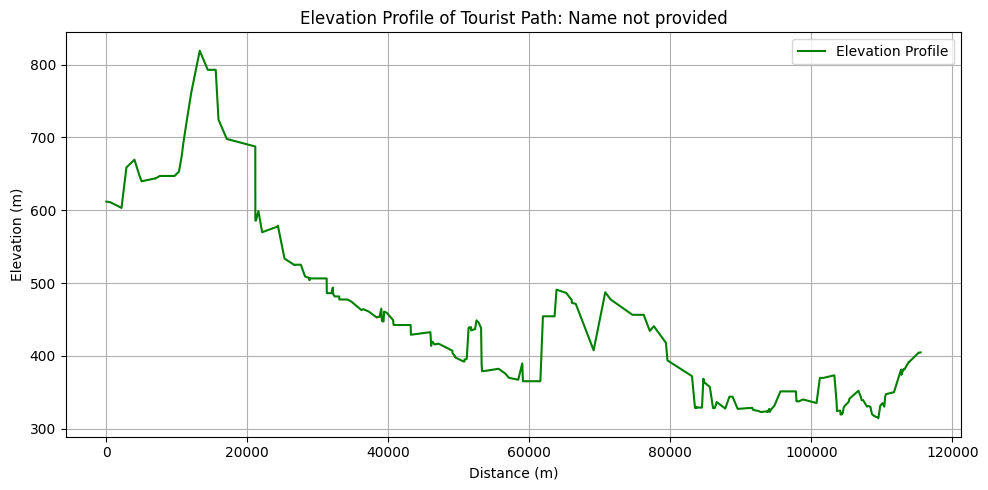

In [19]:
elevations = np.array(gdf['elevation'].dropna())
distances = np.array(gdf['length'].dropna())

cumulative_distances = np.cumsum(distances)


fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(cumulative_distances, elevations, label='Elevation Profile', color=trail_color)

ax.set_xlabel('Distance (m)')
ax.set_ylabel('Elevation (m)')
ax.set_title(f'Elevation Profile of Tourist Path: {route_name}')

ax.grid(True)
ax.legend()

plt.tight_layout()

plt.show()


In [20]:
import overpy
import osmapi
from datetime import datetime

# Initialize Overpass API
api = overpy.Overpass()

# Define the area of interest (Kamenec, Czech Republic)
area_name = "Plzeň, Czech Republic"

# Query to get the area ID for Kamenec
area_query = """
[out:json];
area["name"="Plzeň"]["boundary"="administrative"];
out body;
"""

# Get the area ID
area_result = api.query(area_query)
area_id = area_result.areas[0].id

# Query to get the IDs of hiking routes by KČT for the specified area
relation_query = f"""
[out:json];
area({area_id});
relation(area)["route"="hiking"]["operator"="cz:KČT"];
out ids;
"""

# Fetch data from Overpass API
result = api.query(relation_query)

# Function to download a relation by its ID
def download_relation(relation_id):
    try:
        with osmapi.OsmApi() as api:
            return api.RelationGet(relation_id)
    except osmapi.errors.ElementDeletedApiError:
        print(f"Relation with ID {relation_id} not found.")
        return None

# Download all hiking routes by KČT for the specified area
relations = []
for relation in result.relations:
    rel = download_relation(relation.id)
    if rel:
        relations.append(rel)

# Print the relations
for rel in relations:
    print(rel)

{'id': 87590, 'visible': True, 'version': 113, 'changeset': 145588217, 'timestamp': datetime.datetime(2023, 12, 27, 18, 35, 47), 'user': 'Fjana', 'uid': 10630524, 'tag': {'complete': 'yes', 'destinations': 'Plzeň - Doubravka;Malešice', 'kct_yellow': 'major', 'network': 'rwn', 'operator': 'cz:KČT', 'osmc:symbol': 'yellow:white:yellow_bar', 'ref': '6624', 'route': 'hiking', 'source': 'survey', 'source:ref': 'cs.wikipedia.org', 'type': 'route', 'wikidata': 'Q12059946', 'wikipedia': 'cs:Turistická značená trasa 6624'}, 'member': [{'type': 'node', 'ref': 5369697089, 'role': 'guidepost'}, {'type': 'node', 'ref': 5369697091, 'role': 'guidepost'}, {'type': 'node', 'ref': 360280415, 'role': 'guidepost'}, {'type': 'node', 'ref': 360280265, 'role': 'guidepost'}, {'type': 'node', 'ref': 444725116, 'role': 'guidepost'}, {'type': 'node', 'ref': 360808097, 'role': 'guidepost'}, {'type': 'node', 'ref': 360251906, 'role': 'guidepost'}, {'type': 'node', 'ref': 360251902, 'role': 'guidepost'}, {'type': '

In [21]:
for rel in relations:
    route_info = extract_route_info(rel)
    print("Descriptive information about the path:")
    for key, value in route_info.items():
        print(f"{key}: {value}")
    print("\n")

Descriptive information about the path:
id: 87590
name: Name not provided
official_name: Official name not provided
route_type: hiking
operator: cz:KČT
symbol: yellow:white:yellow_bar
ref: 6624
complete: yes
educational: Not specified
network: rwn
kct_yellow: major
note: No note provided


Descriptive information about the path:
id: 132429
name: Name not provided
official_name: Official name not provided
route_type: hiking
operator: cz:KČT
symbol: green:white:green_bar
ref: 3601
complete: yes
educational: Not specified
network: rwn
kct_yellow: Not specified
note: No note provided


Descriptive information about the path:
id: 6268435
name: Name not provided
official_name: Official name not provided
route_type: hiking
operator: cz:KČT
symbol: yellow:white:yellow_bar
ref: 6732
complete: yes
educational: Not specified
network: lwn
kct_yellow: major
note: část bývalé 6624 - začíná ve Valše (oddělení od zbytku zjištěno 2016-05);na sever od Valchy přeznačeno (2018-05)


Descriptive informatio

In [ ]:
# Convert relations to GeoDataFrame and display the first rows
for rel in relations:
    gdf = relation_to_geodataframe(rel)
    display(gdf.head())

,type,ref,role,geometry
0,way,376865495,,"LINESTRING (13.42411 49.75902, 13.42410 49.758..."
1,way,32089948,,"LINESTRING (13.42429 49.75923, 13.42430 49.759..."
2,way,32089951,,"LINESTRING (13.42311 49.75909, 13.42340 49.759..."
3,way,28983077,,"LINESTRING (13.42264 49.76033, 13.42286 49.759..."
4,way,28983078,,"LINESTRING (13.42252 49.76046, 13.42264 49.76033)"


In [ ]:
# Getting the bounds of the GeoDataFrame (bounding box)
bbox = gdf.total_bounds  # Returns [minx, miny, maxx, maxy]

# Calculate width and height from the bounding box
minx, miny, maxx, maxy = bbox

center = [(miny + maxy) / 2, (minx + maxx) / 2]

m = folium.Map(location=center, zoom_start=14)

gdf.explore(m=m, tiles="carto positron", color=trail_color)

display(m)